# Combining CFA and ECM data

This notebook is a starting point for exploring how to load and explore ECM and CFA data from the ALHIC2201 and ALHIC2302 cores.

The idea is that you can take this script and use it to build your own analysis.

### First up, load packages

You'll need to do this at the start of every notebook. We're just importing some of the most popular, most useful packages (numpy for math, pandas for handleing spreadsheet-style data, matplotlib for making figures)

In [169]:
# these are common imports for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Next, load the ECM data

In [170]:
# here we load data from the ALHIC2201 core
alhic2201_ecm = pd.read_csv('data/ALHIC2201_ECM_binned.csv')

# let's rename depth_m to "depth" for ease of use
alhic2201_ecm.rename(columns={'depth_m': 'depth'}, inplace=True)

# the "head" function displays the first few rows of the dataframe. This let's us quickly inspect the data in a spreadsheet-like format.
alhic2201_ecm.head()

,depth,AC,DC
0,0.015,1.480000e-08,0.000005
1,0.025,1.470000e-08,0.000005
2,0.035,1.460000e-08,0.000006
3,0.045,1.430000e-08,0.000006
4,0.055,1.390000e-08,0.000006


In [171]:
# same process for the ALHIC2302 core
alhic2302_ecm = pd.read_csv('data/ALHIC2302_ECM_binned.csv')
alhic2302_ecm.rename(columns={'depth_m': 'depth'}, inplace=True)
alhic2302_ecm.head()

,depth,AC,DC
0,8.485,1.150000e-08,0.000003
1,8.495,1.120000e-08,0.000003
2,8.505,1.080000e-08,0.000003
3,8.515,1.060000e-08,0.000004
4,8.525,1.040000e-08,0.000004


### Now we'll import our CFA data

This uses a very similar approach as above.

In [172]:
# read in the CFA data for the ALHIC2201 core
alhic2201_cfa = pd.read_csv('data/ALHIC2201_CFA_OSU_NOV2025_prelim.csv')

# now inspect the CFA data for the ALHIC2201 core
alhic2201_cfa.head()

,depth,d18O,d17O,dD,dxs,CH4,CO,concentration,total_counts,small,medium,large,XL,small_percentage,medium_percentage,large_percentage,XL_percentage,age
0,0.00,-42.105682,-22.399210,-333.016773,3.828684,645.748903,0.055761,1192.967580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.05,-39.584441,-21.059456,-317.448121,-0.772593,644.977136,0.059819,3550.764350,337.666667,265.666667,72.000000,0.000000,0.000000,78.677196,21.322804,0.000000,0.000000,NaN
2,0.10,-39.371627,-20.983999,-317.029221,-2.056203,616.075203,0.059558,9682.012793,806.919192,670.191919,133.090909,2.181818,1.454545,79.516601,20.397004,0.051837,0.034558,NaN
3,0.15,-39.459364,-21.046753,-318.352804,-2.677891,514.526616,0.058486,9454.641429,4209.000000,3603.000000,576.000000,18.000000,12.000000,85.602281,13.684961,0.427655,0.285103,NaN
4,0.20,-39.265754,-20.926659,-316.166161,-2.040125,NaN,NaN,10237.391395,3964.666667,3449.166667,478.000000,26.500000,11.000000,87.089287,11.949550,0.684215,0.276948,NaN


In [173]:
# read in the CFA data for the ALHIC2302 core
alhic2302_cfa = pd.read_csv('data/ALHIC2302_CFA_OSU_NOV25_prelim.csv')

# now inspect the CFA data for the ALHIC2302 core
alhic2302_cfa.head()

,depth,d18O,dD,dxs,CH4,CO,CO2,concentration,XL,large,medium,small,total_counts,small_percentage,large_percentage,XL_percentage,flow_rate
0,0.00,-36.164666,-289.652359,-0.335028,596.160222,0.055320,37.864120,2451.693812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064439
1,0.02,-36.094785,-289.328726,-0.570446,594.968096,0.061824,39.646529,2036.517636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064648
2,0.04,-36.071818,-288.793628,-0.219087,594.019483,0.056848,43.760091,4722.915757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065268
3,0.06,-36.086368,-289.146444,-0.455499,594.696116,0.065818,48.746091,1653.496195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065078
4,0.08,-36.257031,-289.140055,0.916192,597.595973,0.062788,48.979152,1844.347893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064974


### Now let's plot the data

I'm going to start with a series of plots showing both cores, with individual subplots for the following proxies:
- DC ECM, units are amps
- AC ECM, units are amps
- d18O, a water isotope temperature proxy (more negative values indicate a colder world), units are permille
- dxs, a water isotope moisture source temperature proxy (higher value indicate the moisture source area, somewhere out in the ocean, was warmer), units are permille
- CH4, atmospheric methane concentration in ppb
- concentration, the particle concentration (by mass), in ppb. This gets at how many dust or basal material particles there are in the ice. Usually there are more particles during a glacial period when the world is colder and dustier.

This is just an example plot to show what you can do. It's probably not the most helpful - plotting the two cores in different colors on the same subplot doesn't help you see the links between different proxies in the same core. I'll leave those comparisons to you! Hopefully you feel able to modify these scripts to achieve some other plot formats.

(70.0, 0.0)

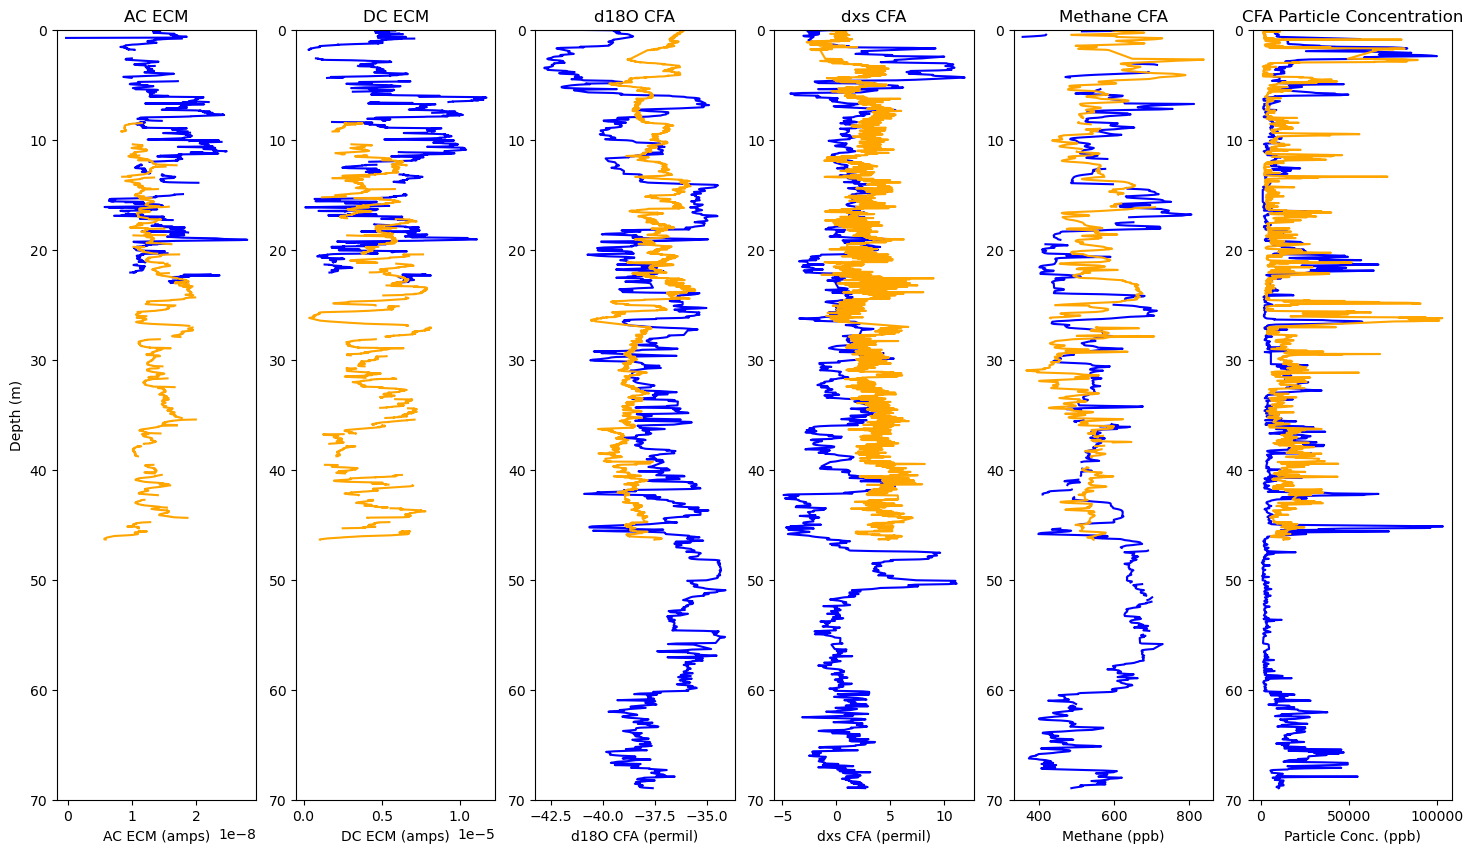

In [174]:
# let's start just by defining some bounds
depth_min = 0    # minimum depth to consider in the analysis
depth_max = 70   # maximum depth to consider in the analysis

# now we'll make the plot
fig, ax = plt.subplots(1,6,figsize=(18, 10))

# plot AC ECM
ax[0].plot(alhic2201_ecm['AC'], alhic2201_ecm['depth'], label='ALHIC2201', color='blue')
ax[0].plot(alhic2302_ecm['AC'], alhic2302_ecm['depth'], label='ALHIC2302', color='orange')
ax[0].set_xlabel('AC ECM (amps)')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('AC ECM')
ax[0].set_ylim(depth_max, depth_min)  # invert y-axis to have depth increasing downwards

# plot DC ECM
ax[1].plot(alhic2201_ecm['DC'], alhic2201_ecm['depth'], label='ALHIC2201', color='blue')
ax[1].plot(alhic2302_ecm['DC'], alhic2302_ecm['depth'], label='ALHIC2302', color='orange')
ax[1].set_xlabel('DC ECM (amps)')
ax[1].set_title('DC ECM') 
ax[1].set_ylim(depth_max, depth_min)  # invert y-axis to have depth increasing downwards

# plot d18O CFA data
ax[2].plot(alhic2201_cfa['d18O'], alhic2201_cfa['depth'], label='ALHIC2201', color='blue')
ax[2].plot(alhic2302_cfa['d18O'], alhic2302_cfa['depth'], label='ALHIC2302', color='orange')
ax[2].set_xlabel('d18O CFA (permil)')
ax[2].set_title('d18O CFA')
ax[2].set_ylim(depth_max, depth_min)  # invert y-axis to have depth increasing downwards

# plot dxs CFA data
ax[3].plot(alhic2201_cfa['dxs'], alhic2201_cfa['depth'], label='ALHIC2201', color='blue')
ax[3].plot(alhic2302_cfa['dxs'], alhic2302_cfa['depth'], label='ALHIC2302', color='orange')
ax[3].set_xlabel('dxs CFA (permil)')
ax[3].set_title('dxs CFA')
ax[3].set_ylim(depth_max, depth_min)  # invert y-axis to have depth increasing downwards

# plot ch4 CFA data
ax[4].plot(alhic2201_cfa['CH4'], alhic2201_cfa['depth'], label='ALHIC2201', color='blue')
ax[4].plot(alhic2302_cfa['CH4'], alhic2302_cfa['depth'], label='ALHIC2302', color='orange')
ax[4].set_xlabel('Methane (ppb)')
ax[4].set_title('Methane CFA')
ax[4].set_ylim(depth_max, depth_min)  # invert y-axis to have depth increasing downwards

# plot concentration CFA data
ax[5].plot(alhic2201_cfa['concentration'], alhic2201_cfa['depth'], label='ALHIC2201', color='blue')
ax[5].plot(alhic2302_cfa['concentration'], alhic2302_cfa['depth'], label='ALHIC2302', color='orange')
ax[5].set_xlabel('Particle Conc. (ppb)')
ax[5].set_title('CFA Particle Concentration')
ax[5].set_ylim(depth_max, depth_min)  # invert y-axis to have

### Explore relationship between any pairs of proxies

Here, we want to be able to explore the relationship between any two pairs of proxies. For example, when AC ECM is high, what is d18O typically doing?

This is fairly easy for the CFA data - it's already binned at 5 cm resolution. But the ECM is at a much higher resolution. So probably not an easy 1:1 comparison.

Here I'm going to define a "function" - a bit of code you can then call later in the script, passing it some data and getting an output. You won't need to change what's in the function but can use it. Treat it like a black box.

#### Make our function

Here I'll make two functions that we can use to make some comparison plots.

In [175]:
def bin_average(depth, values, common_depth):
    depth = np.asarray(depth, dtype=float)
    values = np.asarray(values, dtype=float)
    common_depth = np.asarray(common_depth, dtype=float)
    mids = (common_depth[:-1] + common_depth[1:]) / 2
    first_edge = common_depth[0] - (mids[0] - common_depth[0])
    last_edge = common_depth[-1] + (common_depth[-1] - mids[-1])
    edges = np.concatenate(([first_edge], mids, [last_edge]))
    bin_idx = pd.cut(depth, bins=edges, labels=False, include_lowest=True)
    means = pd.Series(values).groupby(bin_idx).mean()
    return np.array([means.get(i, np.nan) for i in range(len(common_depth))])

In [176]:
# our black-box function that makes a plot showing the relationship between 
# two sets of data, even if they have different depth spacing
def make_comparison_plot(data1,data2,label1,label2):

    # pull out depth and data columns from both datasets
    depth1 = data1['depth']
    depth2 = data2['depth']
    val1 = data1[label1]
    val2 = data2[label2]

    # check if the depth vectors are the same.
    if not np.array_equal(depth1, depth2):
        print("Depth vectors are different. Averaging measurements within nearest-depth bins.")

        # identify which depth vector has fewer points and use that as the common depth grid
        if len(depth1) < len(depth2):
            common_depth = depth1
        else:
            common_depth = depth2
        x = bin_average(depth1, val1, common_depth)
        y = bin_average(depth2, val2, common_depth)
    else:
        print("Depth vectors are the same. No interpolation needed.")
        x = val1
        y = val2

    # make the figure
    x = np.asarray(x, dtype=float).ravel()
    y = np.asarray(y, dtype=float).ravel()
    finite_mask = np.isfinite(x) & np.isfinite(y)
    x = x[finite_mask]
    y = y[finite_mask]
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(x, y, '.')
    ax.set_xlabel(f'{label1}')
    ax.set_ylabel(f'{label2}')

    # fit a linear trendline, report the R^2 value, and plot the trendline
    # sort x and y values by x
    sorted_indices = np.argsort(x)
    x = x[sorted_indices]
    y = y[sorted_indices]
    
    coeffs = np.polyfit(x, y, 1)
    trendline = np.poly1d(coeffs)
    r2 = np.corrcoef(x, y)[0, 1]**2
    ax.plot(x, trendline(x), color='k', label=f'Linear Fit (R^2={r2:.2f})')
    ax.legend()

    return fig, ax



In [177]:
def compute_comparison(depth1, data1, depth2, data2):

    if not np.array_equal(depth1, depth2):
        print("Depth vectors are different. Averaging measurements within nearest-depth bins.")
        common_depth = depth2 if len(depth2) < len(depth1) else depth1
        x = bin_average(depth1, data1, common_depth)
        y = bin_average(depth2, data2, common_depth)
    else:
        print("Depth vectors are the same. No interpolation needed.")
        x = np.asarray(data1, dtype=float)
        y = np.asarray(data2, dtype=float)

    finite_mask = np.isfinite(x) & np.isfinite(y)
    x = x[finite_mask]
    y = y[finite_mask]

    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]
    coeffs = np.polyfit(x_sorted, y_sorted, 1)
    trendline = np.poly1d(coeffs)
    r2 = np.corrcoef(x_sorted, y_sorted)[0, 1]**2

    return x, y, trendline, r2

In [178]:
# our black-box function that makes a plot showing the relationship between 
# two sets of data, even if they have different depth spacing
global alhic2201_cfa, alhic2201_ecm, alhic2302_cfa, alhic2302_ecm




def make_comparison_plot_twocores(label1,label2):

    # pull out depth and data columns from both datasets
    if label1 in alhic2201_ecm.columns and label1 in alhic2302_ecm.columns:
        depth1_alhic2201 = alhic2201_ecm['depth']
        data1_alhic2201 = alhic2201_ecm[label1]
        depth1_alhic2302 = alhic2302_ecm['depth']
        data1_alhic2302 = alhic2302_ecm[label1]
    elif label1 in alhic2201_cfa.columns and label1 in alhic2302_cfa.columns:
        depth1_alhic2201 = alhic2201_cfa['depth']
        data1_alhic2201 = alhic2201_cfa[label1]
        depth1_alhic2302 = alhic2302_cfa['depth']
        data1_alhic2302 = alhic2302_cfa[label1]
    else:
        print("Error: no match in both datasets")
        return

    if label2 in alhic2201_ecm.columns and label2 in alhic2302_ecm.columns:
        depth2_alhic2201 = alhic2201_ecm['depth']
        data2_alhic2201 = alhic2201_ecm[label2]
        depth2_alhic2302 = alhic2302_ecm['depth']
        data2_alhic2302 = alhic2302_ecm[label2]
    elif label2 in alhic2201_cfa.columns and label2 in alhic2302_cfa.columns:
        depth2_alhic2201 = alhic2201_cfa['depth']
        data2_alhic2201 = alhic2201_cfa[label2]
        depth2_alhic2302 = alhic2302_cfa['depth']
        data2_alhic2302 = alhic2302_cfa[label2]
    else:
        print("Error: no match in bothdatasets")
        return


    x_alhic2201, y_alhic2201, trendline_alhic2201, r2_alhic2201 = compute_comparison(
        depth1_alhic2201, data1_alhic2201, depth2_alhic2201, data2_alhic2201
    )
    x_alhic2302, y_alhic2302, trendline_alhic2302, r2_alhic2302 = compute_comparison(
        depth1_alhic2302, data1_alhic2302, depth2_alhic2302, data2_alhic2302
    )


    fig, ax = plt.subplots(figsize=(6, 6))

    # Plot datapoints
    ax.scatter(x_alhic2201, y_alhic2201, color='red', alpha=0.1, label='ALHIC2201')
    ax.scatter(x_alhic2302, y_alhic2302, color='blue', alpha=0.1, label='ALHIC2302')

    # plot trendlines
    ax.plot(x_alhic2201, trendline_alhic2201(x_alhic2201), color='red', linewidth=2, label=f'ALHIC2201 Fit (R²={r2_alhic2201:.2f})')
    ax.plot(x_alhic2302, trendline_alhic2302(x_alhic2302), color='blue', linewidth=2, label=f'ALHIC2302 Fit (R²={r2_alhic2302:.2f})')

    ax.set_xlabel(label1)
    ax.set_ylabel(label2)
    ax.legend()
    plt.tight_layout()

    return fig, ax

### Now let's use our functions to make some plots that yield insight into our cores!

First up, we'll look at the relationship between AC and DC ECM in the ALHIC2201 core. Below is an example of how we do this.

Notice that the function requires we plug in the two datasets we want to use, and then the two columns from each dataset. In the make_comparison_plot figure, we'd always want to use datasets from the same core (but they could be either alhic2201_ecm or alhic2201_cfa)



Depth vectors are the same. No interpolation needed.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Text(0.5, 1.0, 'Comparison of AC ECM and DC ECM in the ALHIC2201 core')

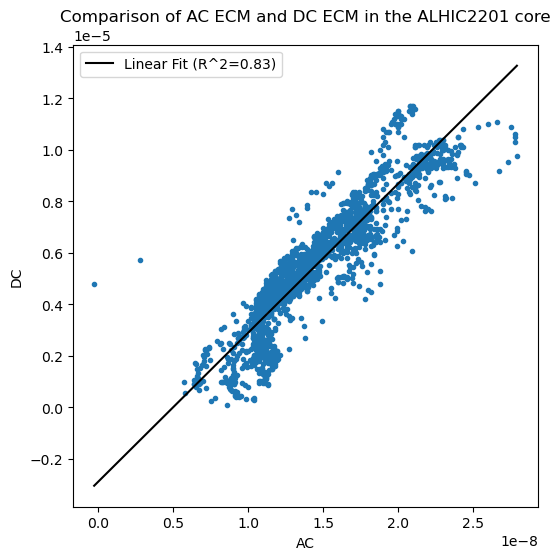

In [179]:
# first example AC vs DC ECM
fig, ax = make_comparison_plot(alhic2201_ecm, alhic2201_ecm, 'AC', 'DC')

# you do have the option to edit, save , or otherwise use the figure like normal after it's created.
# for example, lets add a title
ax.set_title('Comparison of AC ECM and DC ECM in the ALHIC2201 core')


Depth vectors are different. Averaging measurements within nearest-depth bins.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


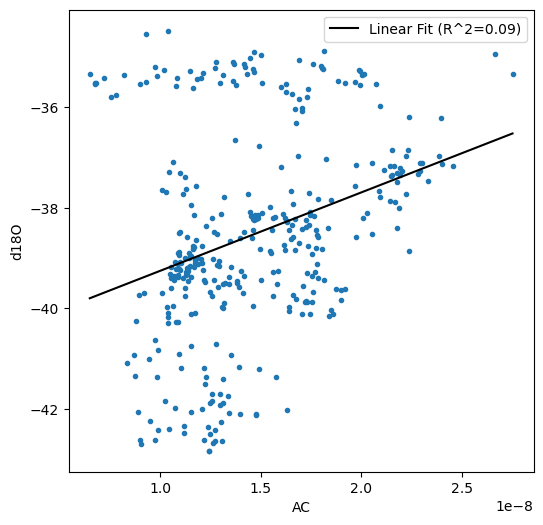

In [180]:
# next example AC ECM vs d18O
fig, ax = make_comparison_plot(alhic2201_ecm, alhic2201_cfa, 'AC', 'd18O')

### Now let's see how these relationships might be different between cores

We'll look at the same two combinations as above, but now in two cores at once. Note that because of the way this function is written, we only need to input the two variables we want to compare, and it will plot both cores.

Depth vectors are the same. No interpolation needed.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Depth vectors are the same. No interpolation needed.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


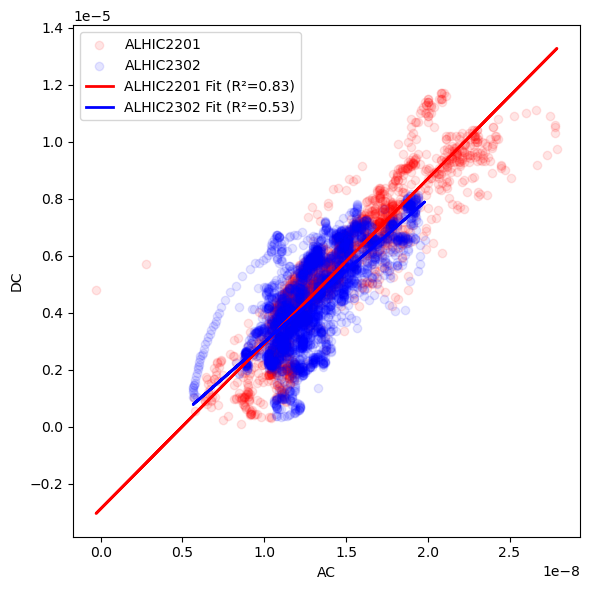

In [181]:
fig, ax = make_comparison_plot_twocores('AC', 'DC')



Depth vectors are different. Averaging measurements within nearest-depth bins.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Depth vectors are different. Averaging measurements within nearest-depth bins.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


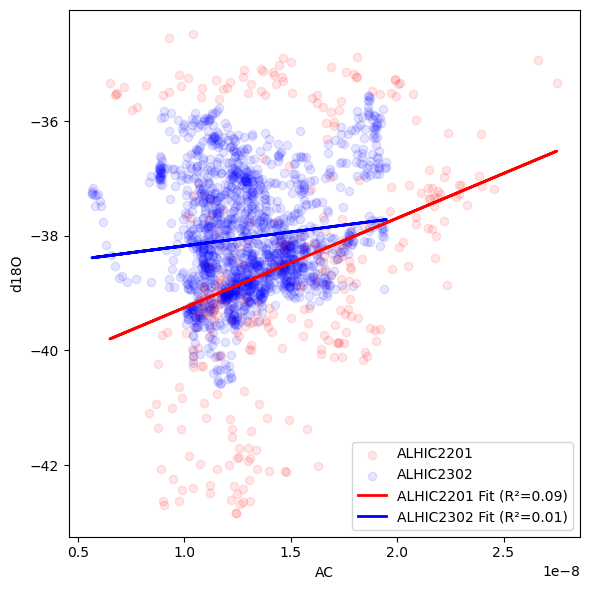

In [182]:
# now let's make a plot comparing AC ECM and d18O CFA in both cores
fig, ax = make_comparison_plot_twocores('AC', 'd18O')

### Suggested work for you to start with:

I'd start by exploring the relationships between all of our variables. That's looking at all pairs of your data variables (AC, DC, concentration, CH4, d18O). Are there variables that are strongly correlated with each other? Or varables that don't seem to vary together? You can do this with the make_comparison_plot_twocores function. See examples above.

If you see relationships that you're interested, then I'd try to make plots showing the two variables next to each other over depth. This will require a little more code editing, but you can follow some of the example code at the top of the document.

If you're not familiar with an R^2 value, I'd give that a quick google. It's a quick and dirty way to get a sense for how well a simple linear relationship explains your data. We're not goign to get very strong values in this data, but I still thought it might be helpful on this first pass through the data.

As always, be in touch with any questions, or if you get stuck!
